# Import libaries 

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

2021-10-11 15:47:36.095968: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-11 15:47:36.096202: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Importing Dataset

In [2]:
train_dir = '../input/indian-food-images-dataset'

In [3]:
train_dir

'../input/indian-food-images-dataset'

In [4]:
Name=[]
for file in os.listdir(train_dir):
    Name+=[file]
print(Name)
print(len(Name))

['mysore_pak', 'ghevar', 'sohan_papdi', 'ras_malai', 'ariselu', 'kofta', 'aloo_tikki', 'gajar_ka_halwa', 'chhena_kheeri', 'kakinada_khaja', 'lassi', 'naan', 'chak_hao_kheer', 'butter_chicken', 'kajjikaya', 'chicken_razala', 'lyangcha', 'aloo_gobi', 'dal_makhani', 'bandar_laddu', 'bhindi_masala', 'unni_appam', 'kuzhi_paniyaram', 'sandesh', 'sohan_halwa', 'rasgulla', 'shankarpali', 'pithe', 'imarti', 'misti_doi', 'navrattan_korma', 'daal_puri', 'malapua', 'dal_tadka', 'aloo_matar', 'palak_paneer', 'makki_di_roti_sarson_da_saag', 'poornalu', 'chicken_tikka', 'kadhi_pakoda', 'basundi', 'chapati', 'phirni', 'chikki', 'sheera', 'karela_bharta', 'cham_cham', 'shrikhand', 'litti_chokha', 'qubani_ka_meetha', 'jalebi', 'kachori', 'aloo_methi', 'maach_jhol', 'kadai_paneer', 'doodhpak', 'chana_masala', 'boondi', 'misi_roti', 'bhatura', 'chicken_tikka_masala', 'double_ka_meetha', 'kalakand', 'poha', 'adhirasam', 'ledikeni', 'dharwad_pedha', 'dum_aloo', 'sutar_feni', 'gavvalu', 'anarsa', 'rabri', 'd

In [5]:

N=[]
for i in range(len(Name)):
    N+=[i]
    
mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [6]:
dataset=[]
testset=[]
count=0
for file in tqdm(Name):
    t=0
    path=os.path.join(train_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(40,40))
        image=img_to_array(image)
        image=image/255.0
        if t<40:
            dataset+=[[image,count]]
        else:
            testset+=[[image,count]]
        t+=1     
    count+=1

100%|██████████| 80/80 [01:03<00:00,  1.27it/s]


In [7]:
data,labels0=zip(*dataset)
test,testlabels0=zip(*testset)

In [8]:
labels1=to_categorical(labels0)
labels=np.array(labels1)

In [9]:
data=np.array(data)
test=np.array(test)

In [10]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [11]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(2560, 40, 40, 3)
(640, 40, 40, 3)
(2560, 80)
(640, 80)


In [12]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.5,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [13]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(40,40,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

2021-10-11 15:48:45.769839: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-11 15:48:45.773126: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-11 15:48:45.773173: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-11 15:48:45.773205: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (0da54db73b18): /proc/driver/nvidia/version does not exist
2021-10-11 15:48:45.773663: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

74842112/74836368 [==============================] - 3s 0us/step


In [14]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(80, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=140)

2021-10-11 15:48:55.214492: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-11 15:48:55.219942: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200160000 Hz


Epoch 1/140
80/80 [==============================] - 31s 252ms/step - loss: 4.4573 - accuracy: 0.0235 - val_loss: 4.2698 - val_accuracy: 0.0359
Epoch 2/140
80/80 [==============================] - 17s 209ms/step - loss: 4.1303 - accuracy: 0.0584 - val_loss: 4.0799 - val_accuracy: 0.0656
Epoch 3/140
80/80 [==============================] - 16s 206ms/step - loss: 3.8501 - accuracy: 0.0928 - val_loss: 3.8797 - val_accuracy: 0.0859
Epoch 4/140
80/80 [==============================] - 17s 212ms/step - loss: 3.6422 - accuracy: 0.1154 - val_loss: 3.8216 - val_accuracy: 0.0969
Epoch 5/140
80/80 [==============================] - 16s 205ms/step - loss: 3.4312 - accuracy: 0.1580 - val_loss: 3.7139 - val_accuracy: 0.1156
Epoch 6/140
80/80 [==============================] - 17s 208ms/step - loss: 3.3420 - accuracy: 0.1885 - val_loss: 3.6839 - val_accuracy: 0.1172
Epoch 7/140
80/80 [==============================] - 16s 206ms/step - loss: 3.2883 - accuracy: 0.1803 - val_loss: 3.6338 - val_accuracy:

In [17]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.00      0.00      0.00         8
           2       0.25      0.38      0.30         8
           3       0.40      0.40      0.40         5
           4       0.25      0.12      0.17         8
           5       0.00      0.00      0.00        15
           6       0.29      0.44      0.35         9
           7       0.20      0.18      0.19        11
           8       0.14      0.17      0.15         6
           9       0.17      0.14      0.15         7
          10       0.60      0.50      0.55         6
          11       0.00      0.00      0.00         6
          12       0.21      0.23      0.22        13
          13       0.00      0.00      0.00         6
          14       0.29      0.25      0.27         8
          15       0.22      0.33      0.27         6
          16       0.50      0.11      0.18         9
          17       0.29    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


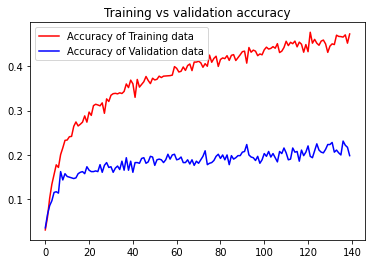

<Figure size 432x288 with 0 Axes>

In [18]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

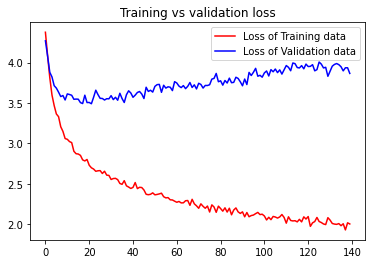

<Figure size 432x288 with 0 Axes>

In [19]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [20]:
#load_img('../input/indian-food-images-dataset/aloo_shimla_mirch/14be800ff7.jpg',target_size=(40,40))

In [21]:
image=load_img('../input/indian-food-images-dataset/boondi/10d5997860.jpg',target_size=(40,40))
image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [22]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is boondi.


In [23]:
import tensorflow.keras as k
import tensorflow as tf

print(k.__version__)
print(tf.__version__)

2.4.0
2.4.1


In [24]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37) 
[GCC 9.3.0]
Version info.
sys.version_info(major=3, minor=7, micro=10, releaselevel='final', serial=0)


In [25]:
model.save('IF.h5')